In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
#import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.use("Agg")
# used for plot interactive graph. I like it most for plot

C:\Users\atul\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\atul\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\atul\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\atul\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\atul\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\atul\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\a

In [2]:
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns # this is used for the plot the graph
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn import tree

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [4]:
from sklearn.metrics import accuracy_score
from sklearn import svm    		# To import the svm classifier

import random
data = pd.read_csv('pacific.csv')
print(data.head(6))

         ID                 Name      Date  Time Event Status Latitude  \
0  EP011949              UNNAMED  19490611     0           TS    20.2N   
1  EP011949              UNNAMED  19490611   600           TS    20.2N   
2  EP011949              UNNAMED  19490611  1200           TS    20.2N   
3  EP011949              UNNAMED  19490611  1800           TS    20.3N   
4  EP011949              UNNAMED  19490612     0           TS    20.4N   
5  EP011949              UNNAMED  19490612   600           TS    20.5N   

  Longitude  Maximum Wind  Minimum Pressure      ...       Low Wind SW  \
0    106.3W            45              -999      ...              -999   
1    106.4W            45              -999      ...              -999   
2    106.7W            45              -999      ...              -999   
3    107.7W            45              -999      ...              -999   
4    108.6W            45              -999      ...              -999   
5    109.4W            45            

In [5]:
#print(data.info())

#data['Status'] = data['Status'].map({'TS':1,'HU':0})

#data.describe() # this will describe the all statistical function of our data

data.Status = pd.Categorical(data.Status)
data['Status'] = data.Status.cat.codes
print(data.head())

         ID                 Name      Date  Time Event  Status Latitude  \
0  EP011949              UNNAMED  19490611     0            11    20.2N   
1  EP011949              UNNAMED  19490611   600            11    20.2N   
2  EP011949              UNNAMED  19490611  1200            11    20.2N   
3  EP011949              UNNAMED  19490611  1800            11    20.3N   
4  EP011949              UNNAMED  19490612     0            11    20.4N   

  Longitude  Maximum Wind  Minimum Pressure      ...       Low Wind SW  \
0    106.3W            45              -999      ...              -999   
1    106.4W            45              -999      ...              -999   
2    106.7W            45              -999      ...              -999   
3    107.7W            45              -999      ...              -999   
4    108.6W            45              -999      ...              -999   

   Low Wind NW  Moderate Wind NE  Moderate Wind SE  Moderate Wind SW  \
0         -999              -999

In [6]:
# lets get the frequency of different typhoons
#sns.countplot(data['Status'],label="Count")
#plt.show()

In [7]:
random.seed(2)
pred_columns = data[:]
pred_columns.drop(['Status'],axis=1,inplace=True)
pred_columns.drop(['Event'],axis=1,inplace=True)
pred_columns.drop(['Latitude'],axis=1,inplace=True)
pred_columns.drop(['Longitude'],axis=1,inplace=True)
pred_columns.drop(['ID'],axis=1,inplace=True)
pred_columns.drop(['Name'],axis=1,inplace=True)
pred_columns.drop(['Date'],axis=1,inplace=True)
pred_columns.drop(['Time'],axis=1,inplace=True)
prediction_var = pred_columns.columns
print(list(prediction_var))

C:\Users\atul\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\atul\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\atul\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\atul\Anaconda3\lib\s

['Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']


C:\Users\atul\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\atul\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\atul\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\atul\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying t

In [8]:
# now these are the variables which will use for prediction
#now split our data into train and test

train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(18295, 22)
(7842, 22)


In [9]:
train_X = train[prediction_var]# taking the training data input
train_y= train['Status']# This is output of our training data
#print(list(data.columns))
print(list(train.columns))

['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude', 'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']


In [10]:
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test['Status']   #output value of test dat

In [18]:
#RandomForest classifier
model=RandomForestClassifier(n_estimators=100)# a simple random forest model
model.fit(train_X,train_y)# now fit our model for traiing data
prediction=model.predict(test_X)# predict for the test data
# prediction will contain the predicted value by our model predicted values of diagnosis column for test inputs
print(metrics.accuracy_score(prediction,test_y)) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

0.959066564652


In [19]:
#Decision Tree
model = tree.DecisionTreeClassifier()
model.fit(train_X,train_y)# now fit our model for traiing data
prediction=model.predict(test_X)# predict for the test data
# prediction will contain the predicted value by our model predicted values of diagnosis column for test inputs

In [20]:
df=pd.DataFrame(prediction,test_y)
print(df)

print(metrics.accuracy_score(prediction,test_y)) # to check the accuracy
#here we will use accuracy measurement between our predicted value and our test output values

gnb = GaussianNB()
y_pred_gnb = gnb.fit(train_X, train_y)
target_pred = y_pred_gnb.predict(test_X)

cnf_matrix_gnb = confusion_matrix(test_y, y_pred_gnb)
print(cnf_matrix_gnb)
print(metrics.accuracy_score(y_pred_gnb,test_y)) # to check the accuracy
print("Number of mislabeled points out of a total %d points : %d"
%(data.shape[0],(test_y != y_pred_gnb).sum()))
print(accuracy_score(test_y, target_pred))

         0
Status    
11      11
10      10
10      10
11      11
10      10
10      10
5        5
10      10
11      11
11      11
11      11
0        5
3        3
10       5
10      10
11      11
10      10
3        3
11      11
11      11
11      11
3        3
11      11
11      11
3        3
11      11
11      11
11      11
10      10
11      11
...     ..
3        3
11      11
3        3
11      11
11      11
10      10
3        3
3        3
3        3
11      11
5        5
10      10
10      10
3        3
11      11
11      11
11      11
10      10
10      10
10       5
10      10
3        3
3        3
3        3
10      10
10      10
11      11
11      11
11      11
3        3

[7842 rows x 1 columns]
0.95791889824


TypeError: Expected sequence or array-like, got estimator GaussianNB(priors=None)

(7842,)
(7842,)
(7842,)
(7842, 14)
(18295, 14)


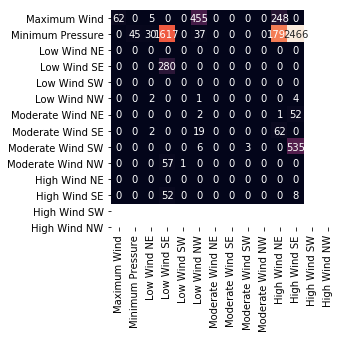

In [22]:
labels = gnb.predict(test_X)
mat = confusion_matrix(test_y, target_pred)
print(test_y.shape)
print(target_pred.shape)
print(labels.shape)
print(test_X.shape)
print(train_X.shape)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=prediction_var, yticklabels=prediction_var)
#matplotlib.xlabel('true label')
matplotlib.pyplot.show()

In [26]:
#matplotlib('predicted label')
gnb = GaussianNB()
mnb = MultinomialNB()
y_pred_gnb = gnb.fit(train_X, train_y).predict(test_X)
#target_pred = y_pred_mnb.predict(test_X)
print(accuracy_score(test_y, y_pred_gnb))
cnf_matrix_gnb = confusion_matrix(test_y, y_pred_gnb)
print(cnf_matrix_gnb)
print(metrics.accuracy_score(y_pred_gnb,test_y)) # to check the accuracy

0.0508798775822
[[  62    0    0    0    0    0    0    0    0    0    0    0]
 [   0   45    0    0    0    0    0    0    0    0    0    0]
 [   5   30    0    0    0    2    0    2    0    0    0    0]
 [   0 1617    0  280    0    0    0    0    0   57    0   52]
 [   0    0    0    0    0    0    0    0    0    1    0    0]
 [ 455   37    0    0    0    1    2   19    6    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    3    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [ 248 1790    0    0    0    0    1   62    0    0    0    0]
 [   0 2466    0    0    0    4   52    0  535    0    0    8]]
0.0508798775822


In [27]:
print("Number of mislabeled points out of a total %d points : %d"
%(data.shape[0],(test_y != y_pred_gnb).sum()))

Number of mislabeled points out of a total 26137 points : 7443


In [28]:
print(accuracy_score(test_y, y_pred_gnb))

0.0508798775822


In [29]:
model = svm.SVC(kernel='linear')
model.fit(train_X,train_y)
#Predict Output
predicted= model.predict(test_X)
print("SVM accuray:",accuracy_score(test_y, predicted))

SVM accuray: 0.955241009946
